In [1]:
import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)

Get Team ID's for all NBA teams

In [3]:
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = pd.DataFrame(teams.get_teams())
#print('Number of teams fetched: {}'.format(len(nba_teams)))
#nba_teams

#create a list of all ids
team_ids = nba_teams['id'].tolist()
print(team_ids)

[1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]


Create a nested list of all team ID's and last 5 seasons that will be used in for loop api call.

In [4]:
import itertools
season = ['2021-22','2020-21','2019-20','2018-19','2017-18']
#create a list of all permutations of team_ids and season
team_season = list(itertools.product(team_ids, season))



Call nba_api for all teams for the given seasons based on previous list that was created

In [6]:
from nba_api.stats.endpoints import leaguegamefinder
NBA_seasons = pd.DataFrame()
#get all games for team_ids
for i in team_season:
    t, s = i
    games = leaguegamefinder.LeagueGameFinder(team_id_nullable = t,season_nullable = s,season_type_nullable ='Regular Season').get_data_frames()[0]
    NBA_seasons = NBA_seasons.append(games, ignore_index=True)

/var/folders/71/8rtftxrj1njcvdvj90ttmthc0000gn/T/ipykernel_18638/942571498.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NBA_seasons = NBA_seasons.append(games, ignore_index=True)
/var/folders/71/8rtftxrj1njcvdvj90ttmthc0000gn/T/ipykernel_18638/942571498.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NBA_seasons = NBA_seasons.append(games, ignore_index=True)
/var/folders/71/8rtftxrj1njcvdvj90ttmthc0000gn/T/ipykernel_18638/942571498.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NBA_seasons = NBA_seasons.append(games, ignore_index=True)
/var/folders/71/8rtftxrj1njcvdvj90ttmthc0000gn/T/ipykernel_18638/942571498.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

Get team stats for specific team

<AxesSubplot:xlabel='TEAM_ABBREVIATION'>

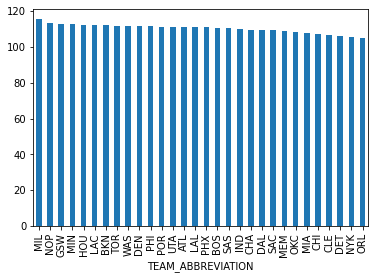

In [15]:
#plot mean points per game for each team abbreviation ascending by PTS
NBA_seasons.groupby('TEAM_ABBREVIATION').mean()['PTS'].sort_values(ascending=False).plot(kind='bar')
#NBA_seasons.groupby('TEAM_ABBREVIATION').PTS.mean().plot(kind='bar')


<AxesSubplot:xlabel='GAME_DATE'>

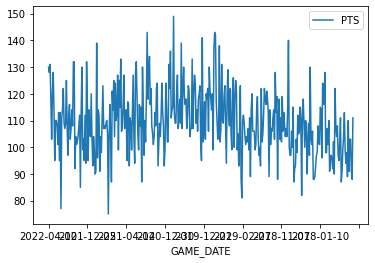

In [18]:
#filter Team_Abbreviation by DAL and plot PTS over time
NBA_seasons.loc[NBA_seasons['TEAM_ABBREVIATION'] == 'DAL'].plot(x='GAME_DATE', y='PTS', kind='line')
#NBA_seasons.groupby('SEASON_ID').PTS.plot(kind='line')
#NBA_seasons.groupby('GAME_DATE').PTS.mean().plot(kind='line')